# COVID-19 identification in primary care records from Feb-July 2020: classification of codes for OpenSAFELY studies

## Background

Primary care records offer an opportunity to ascertain cases of COVID-19 which do not necessarily result in hospital admission or death. This could be useful for studying the burden of COVID-19 in the community, risk factors for SARS-CoV-2 infection separately to risk of severe COVID-19, risk factors for mortality and case fatality ratios among those infected, and post-viral effects in people who had COVID-19 that did not require hospitalisation. 

There are over 100 primary care (CTV3) codes with terms related to COVID-19 used by TPP and available for selection in studies performed in the OpenSAFELY platform (https://opensafely.org/).  The majority of these codes have been newly created for use in the current pandemic. The aim of this work was to assign these codes into categories related to the identification of COVID-19 in primary care, and to provide advice for studies using the OpenSAFELY platform that require people to be classified by their COVID-19 case status as defined in primary care records (either as an exposure or as an outcome).

## Methods

An initial list of TPP primary care codes related to COVID-19 was obtained by searching the TPP database for terms containing "COV-2", "Coronavirus", or "COVID". The returned terms were cross-checked against the NHS Digital [COVID-19 SNOMED CT codes](https://hscic.kahootz.com/connect.ti/COVID19_info_sharing/view?objectId=67227941) and CTV3 codes for any missing terms which were added to the list when found.  The resulting list of terms was then reviewed by a team of clinicians, epidemiologists and statisticians in order to identify distinct categories of terms and assign terms into one of these distinct categories. 

An initial analysis of (probable case and suspected case) sub-categories was then performed by plotting the following using OpenSAFELY data from between Feb – July 2020 (1) the frequency of codes entered into TPP software by GPs over time and (2) the proportion of people dying due to (a) COVID-19 and (b) causes other than COVID-19 (using ONS cause of death data) in the 80 days after a record of a (probable case or suspected case) primary care code in TPP.



## Results

A total of 174 terms were identified. These were assigned into the 13 categories/subcategories detailed in the table below. The 13 codelists for classifying COVID-19 are publicly available on OpenSAFELY.org for inspection and re-use [codelists.opensafely.org](https://codelists.opensafely.org/). 

| Category  |  Sub-category (if applicable) |  Description |
|:---|:---|:---|
| Probable case | Clinical code | Clinical diagnosis of COVID-19 made |
|  | Positive test |  Record of positive test result for SARS-CoV-2 (__active infection__) |
|  | Sequelae | Symptom or condition recorded as secondary to SARS-CoV-2 |
| Suspected case | Advice | General advice given about SARS-CoV-2 |
|  | Had test | Record of having had a test for active infection with SARS-CoV-2 |
|  | Isolation code | Self or household-isolation recorded |
|  | Non-sepcific clinical assessment | Clinical assessments plausibly related to COVID-19 |
|  | Suspected codes | "Suspect" mentioned, or previous COVID-19 reported |
| Historic case | - | SARS-CoV-2 antibodies or immunity recorded |
| Potential historic case | - | Has had a test for SARS-CoV-2 antibodies |
| Exposure to disease | - | Record of contact/exposure/procedure |
| Antigen test negative | - | Record of negative test result for SARS-CoV-2 |
| COVID-19 related contact but case status not specified | - | Healthcare contact related to COVID-19 but not case status |

"Probable" and "suspected" sub-categories are explored further here. Plots of frequency of codes (Figure 1) showed that while the frequency of use of "probable case: clinical code" (n=26151) was similar to "probable case: positive test" (n=19653) over time, "probable case: sequelae" codes were used much less frequently over the whole time period (n=2130). Suspected case sub-categories were used much more frequently than “probable case: positive test” - suspected case: "advice given" (n=268435), "isolation code" (n=112151) and "suspected codes" (n=339873) (Figure 1). Plots of causes of death after each code showed marked differences in the proportion of death due to COVID-19 compared to deaths due to other causes for all probable case sub-categories; in contrast, COVID-19 deaths were not substantially higher than  non-COVID deaths following codes in the "suspected" COVID-19 case sub-categories (Figure 2). 

## Conclusion

A high level of COVID-19 related mortality in people identified as "probable cases" is consistent with these codes identifying true COVID-19 cases with high specificity. "Suspected case" codes were more widely used but a much lower level of subsequent COVID-19 related mortality suggesting that these codes may have low specificity for COVID-19 and should be used with care.  Further work will include assessing the impact of the introduction of pillar 2 test results on utilisation of these codes, investigating code sensitivity, and understanding how individual patient characteristics relate to the varying probability of being tested.




## Figure 1: Frequency of primary care code use over time.






## Figure 2: Comparison of mortality from (1) COVID-19 or (2) other causes in the 80 days following the primary care code.





In [ ]:
import pyodbc
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from contextlib import contextmanager
from datetime import date
from IPython.display import display, Markdown

In [ ]:
# dummy data
#server = 'covid.ebmdatalab.net,1433'
#database = 'OPENCoronaExport' 
#username = 'SA'
#password = 'ahsjdkaJAMSHDA123[' 
#cnxn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
#cursor = cnxn.cursor()

## OS DB
server = '192.168.201.1'
database = 'OpenCorona'
username = "-"
password = "-"
#cnxn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+password)
#cursor = cnxn.cursor()

In [ ]:
# use this to open connection
@contextmanager
def closing_connection(server, database, username, password):
    dsn = (
        "DRIVER={ODBC Driver 17 for SQL Server};SERVER="
        + server
        + ";DATABASE="
        + database
        + ";UID="
        + username
        + ";PWD="
        + password
    )
    cnxn = pyodbc.connect(dsn)
    try:
        yield cnxn
    finally:
        cnxn.close()

## Technical details

### Time period

The date that this notebook was last run is reported below. It reflects the database at the run date, not the current date, and may be out-of-date. Instructions for re-running are below.

Codelist activity is reported from 1 Feb 2020 to the (latest available date). If a clinical code appears on different dates, the earilest date is used. 

### Study definition data

This dataset is available from `/output/input.csv`, created using the study definition `/analysis/study_definintion.py`. The `input.csv` file is imported as a pandas dataframe called `df` and is not exposed in this notebook. 

If there are multiple events per person within the extraction period, the latest event date is extracted.

In [5]:
today.strftime('%Y-%m-%d')

'2020-08-24'

### Import libraries and connect to server

In [4]:
with closing_connection(server, database, username, password) as cnxn:
    DBbuild = pd.read_sql("""select * from LatestBuildTime""", cnxn)

# select start and end dates
start_date = pd.to_datetime("2020-02-01", format='%Y-%m-%d')
end_date = pd.to_datetime(DBbuild['DtLatestBuild'].values[0], format='%Y-%m-%d')
today = date.today()

In [8]:
#specify date columns
date_cols = [
        "gp_consult_date",
        "viral_test_date",
        "viral_pve_test_date",
        "ed_attendance_date",
        "hosp_admission_date",
        "icu_admission_date",
        "cpns_death_date",
        "ons_death_date"
]

# import data
df = pd.read_csv(
    filepath_or_buffer = '../output/input_latestdates.csv',    
    parse_dates = date_cols
)

In [9]:
## View dataframe 
#print(df)

## check types
#print(df.dtypes)

## check earliest and latest dates
#print(df[date_cols].agg(['min', 'max']).transpose())

# derive some values:
df_start_date = df[date_cols].min().min()
df_end_date = df[date_cols].max().max()

In [10]:
# choose only date variables
event_dates = df.filter(items=date_cols)

# Make a dataframe with consecutive dates
consec_dates = pd.DataFrame(
    index=pd.date_range(start=start_date, end=end_date, freq="D")
)

### OpenSAFELY database data
We also extract data directly from the OpenSAFELY database, and there may be multiple events per person.

In [11]:
def datequery(table, var_table, var_df, from_date):
    query = (
      "select " + var_table + " as " + var_df
    + " from " + table
    + " where " + var_table + " >= convert(date, '" + from_date + "')"
    )
    return query


start_date_text = start_date.strftime('%Y-%m-%d')

APCS_query = datequery("APCS", "Admission_Date", "hosp_admission_date", start_date_text)
CPNS_query = datequery("CPNS", "DateOfDeath", "cpns_death_date", start_date_text)
EC_query = datequery("EC", "Arrival_Date", "ed_attendance_date", start_date_text)
ICNARC_query = datequery("ICNARC", "CONVERT(date, IcuAdmissionDateTime)", "icu_admission_date", start_date_text)
ONS_query = datequery("ONS_Deaths", "dod", "ons_death_date", start_date_text)
#S1_query = "" # need to figure out which "events" are most relevant here
SGSS_query = datequery("""( 
         SELECT * FROM SGSS_Positive 
         UNION
         SELECT * FROM SGSS_Negative
         )  as a""", 
        "Earliest_Specimen_Date", "test_specimen_date", start_date_text)
SGSSpos_query = datequery("SGSS_Positive", "Earliest_Specimen_Date", "test_specimen_date", start_date_text)

with closing_connection(server, database, username, password) as cnxn:
    APCS_df = pd.read_sql(APCS_query, cnxn)
    CPNS_df = pd.read_sql(CPNS_query, cnxn)
    EC_df = pd.read_sql(EC_query, cnxn)
    ICNARC_df = pd.read_sql(ICNARC_query, cnxn)
    ONS_df = pd.read_sql(ONS_query, cnxn)
    SGSS_df = pd.read_sql(SGSS_query, cnxn)
    SGSSpos_df = pd.read_sql(SGSSpos_query, cnxn)  

In [12]:
# The following function is used to calculate the daily count for events

def eventcountdf(all_dates, event_dates):

    # initialise dataset
    in_counts = all_dates
    
    for col in event_dates:

        # Creates a series of the entry date of the index event
        in_date = event_dates.loc[:, col]

        in_counts = in_counts.join(
            pd.DataFrame(in_date, columns=[col]).groupby(col)[col].count().to_frame()
        )

    # convert nan to zero
    in_counts = in_counts.fillna(0)
    
    return(in_counts)

In [13]:
# The following function is used to calculate the daily count for events
def eventcountseries(all_dates, event_dates):
    counts = event_dates.value_counts().reindex(all_dates.index, fill_value=0)
    return(counts)

In [14]:
eventcounts_day = eventcountdf(consec_dates, event_dates)
eventcounts_week = eventcounts_day.resample('W').sum()

### All events
To get a sense of relative frequencies. Log-scaled, presented by week. 

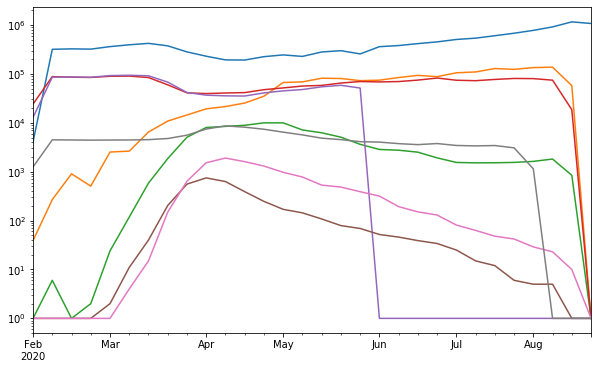

In [15]:
#eventcounts_day.apply(lambda x: x+1).plot(logy=True, figsize=(10,6), legend=False).legend(loc='center left',bbox_to_anchor=(1,0.5))
eventcounts_week.apply(lambda x: x+1).plot(logy=True, figsize=(10,6), legend=False)

In [16]:
# This function plots events counts over time both overall and for the last X days up to the most recent extracted event.

def plotcounts(date_df, events1, events2=None, byweek=False, title="", lookback=30):

       
    def createcounts(events):
        counts = eventcountseries(date_df, events)

        if byweek:
            counts = counts.resample('W').sum()

        lastdate = events1.max()
        lastdaterecent = lastdate - pd.to_timedelta(lookback, unit="D")

        lastcounts = counts.loc[(counts.index >= lastdaterecent) & (counts.index <= lastdate)]

        redact = (lastcounts <6) & (lastcounts>0)
        lastcounts = lastcounts.where(~redact, 2.5) #redact small numbers
        
        return counts, lastcounts, redact
    
    counts1, lastcounts1, redact1 = createcounts(events1)
    if events2 is not None:
        counts2, lastcounts2, redact2 = createcounts(events2)
    
    lastdatestring = events1.max().strftime('%Y-%m-%d')
    
    fig, axs = plt.subplots(1, 2, figsize=(15,5))
    
    axs[0].plot(counts1.index, counts1, color='blue', label='study def')
    if events2 is not None:
        axs[0].plot(counts2.index, counts2, color='orange', linestyle='dashed', label='direct DB')
    axs[0].set_ylabel('event counts')
    axs[0].xaxis.set_tick_params(labelrotation=70)
    axs[0].set_ylim(bottom=0) # might remove this in future depending on count fluctuation
    axs[0].grid(True)
    axs[0].set_title("Since 2020-02-01")
    axs[0].legend()
    
    axs[1].plot(lastcounts1.index, lastcounts1, label=events1.name, marker='o', color='blue')
    axs[1].plot(lastcounts1[redact1].index, lastcounts1[redact1], 'o', linestyle='dashed', color='tomato')
    if events2 is not None:
        axs[1].plot(lastcounts2.index, lastcounts2, label=events2.name, marker='o', linestyle='dashed', color='orange')
        axs[1].plot(lastcounts2[redact2].index, lastcounts2[redact2], 'o', color='tomato')    
    axs[1].xaxis.set_tick_params(labelrotation=70)
    axs[1].xaxis.set_major_locator(ticker.MultipleLocator(2))
    axs[1].set_ylim(bottom=0)
    axs[1].grid(True)
    axs[1].set_title("Last "+str(lookback)+" days of data\nLatest date is "+lastdatestring)
    
    #plt.subplots_adjust(wspace = 0.2, hspace = 0.9)
    plt.tight_layout()
    fig.suptitle(title, y=1)
    plt.show()
    

### Event frequency over time for each dataset
Overall and the last month up to the most recent event date. Counts between 1 and 5 are redacted (set to 2.5) and coloured red. 

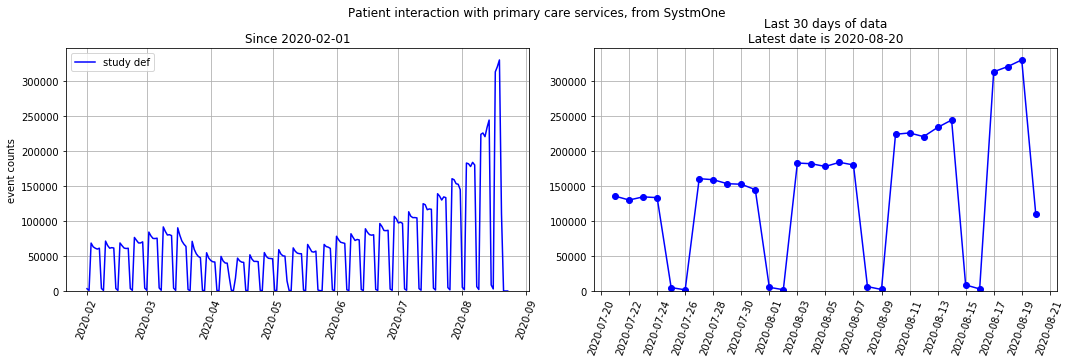

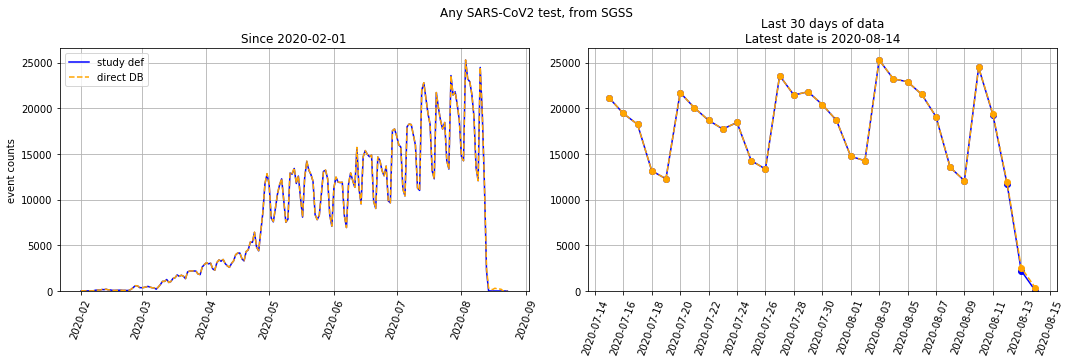

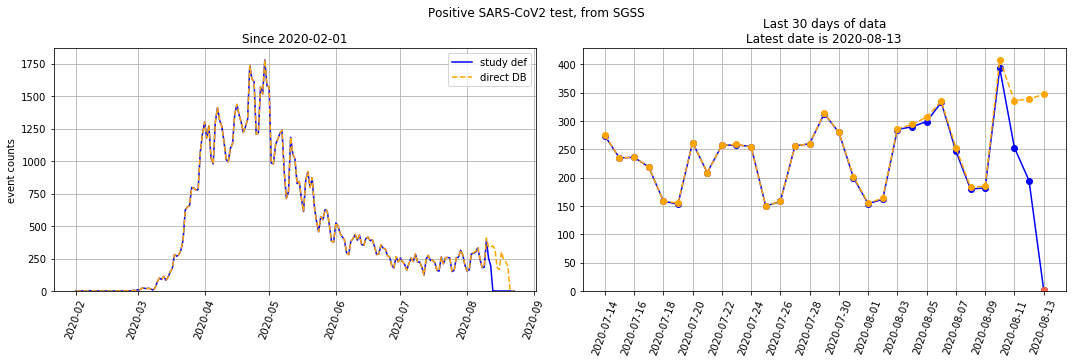

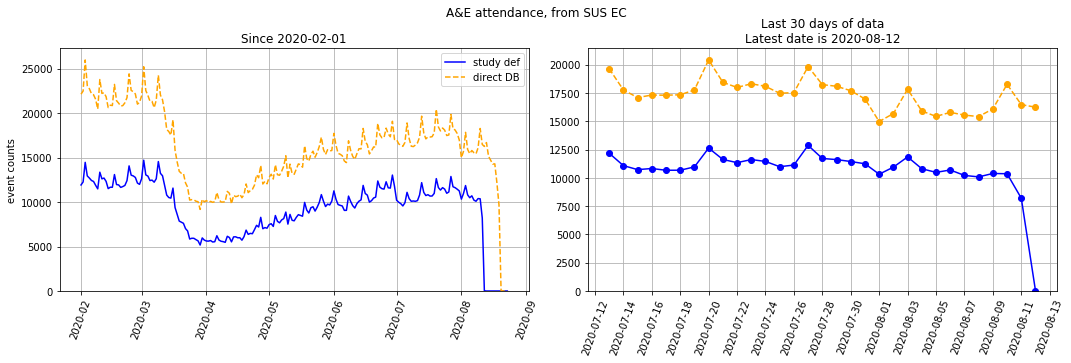

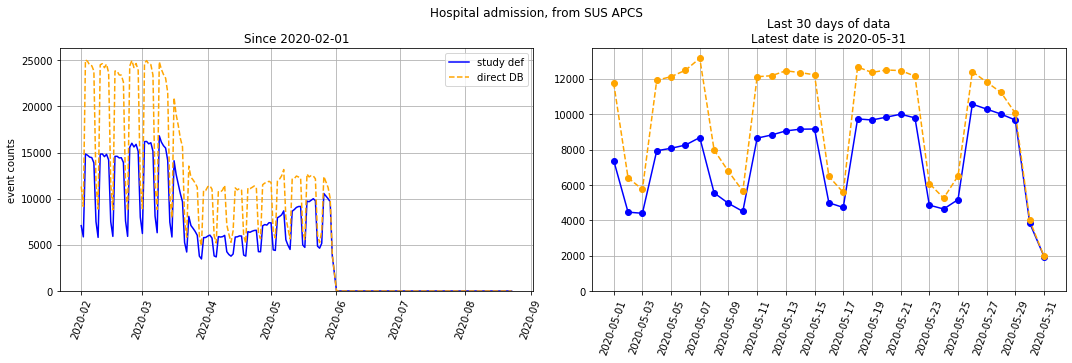

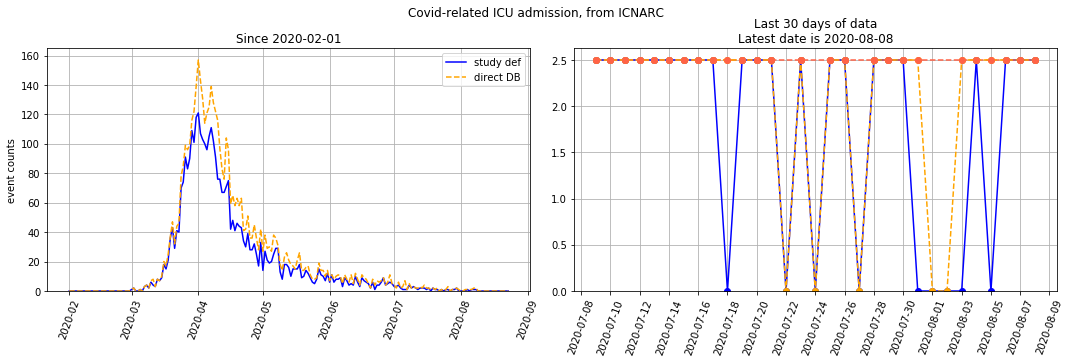

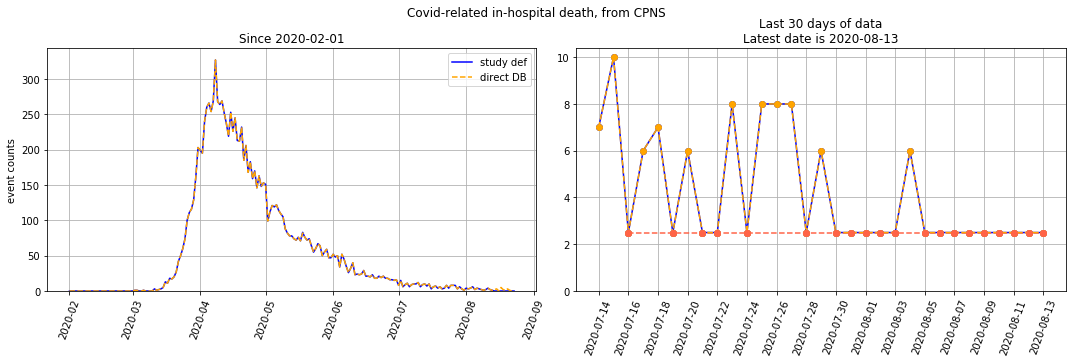

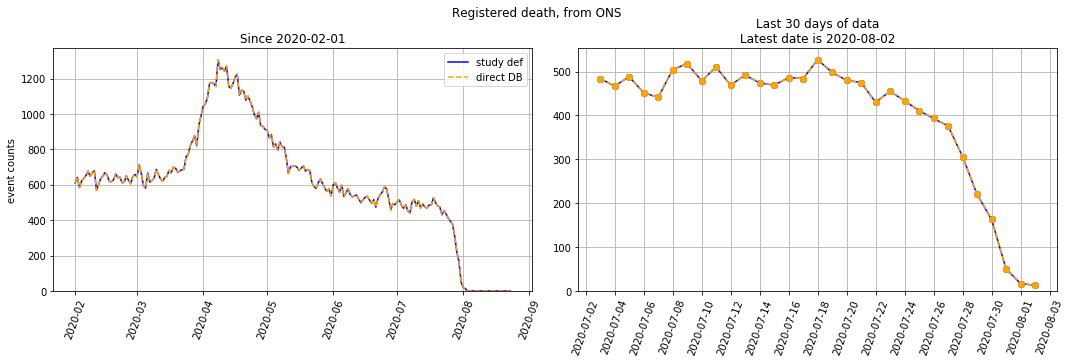

In [17]:
plotcounts(consec_dates, event_dates["gp_consult_date"], None, title="Patient interaction with primary care services, from SystmOne")
plotcounts(consec_dates, event_dates["viral_test_date"], SGSS_df['test_specimen_date'], title="Any SARS-CoV2 test, from SGSS")
plotcounts(consec_dates, event_dates["viral_pve_test_date"], SGSSpos_df['test_specimen_date'], title="Positive SARS-CoV2 test, from SGSS")
plotcounts(consec_dates, event_dates["ed_attendance_date"], EC_df['ed_attendance_date'], title="A&E attendance, from SUS EC")
plotcounts(consec_dates, event_dates["hosp_admission_date"], APCS_df['hosp_admission_date'], title="Hospital admission, from SUS APCS")
plotcounts(consec_dates, event_dates["icu_admission_date"], ICNARC_df['icu_admission_date'], title="Covid-related ICU admission, from ICNARC")
plotcounts(consec_dates, event_dates["cpns_death_date"], CPNS_df['cpns_death_date'], title="Covid-related in-hospital death, from CPNS")
plotcounts(consec_dates, event_dates["ons_death_date"], ONS_df['ons_death_date'], title="Registered death, from ONS")

In [18]:
### number of visits per patient

def recurrentquery(table, id_table, date_table, from_date, head=5):
    query = (
    f"""
    SELECT a.*, b.patients_with_exactly_X_events 
    FROM (
        SELECT X, COUNT(X) AS patients_with_at_least_X_events 
        FROM
        (
            SELECT {id_table}, ROW_NUMBER() OVER(PARTITION BY {id_table} ORDER BY {id_table})  AS X
            FROM {table}
            WHERE {date_table} >= CONVERT(date, '{from_date}')
        ) AS a
        GROUP BY X
    ) AS a
    LEFT JOIN
    (
        SELECT X, COUNT(X) AS patients_with_exactly_X_events 
        FROM
        (
            select count(*) AS X
            FROM {table}
            WHERE {date_table} >= CONVERT(date, '{from_date}')
            GROUP BY {id_table}
        ) AS a
        GROUP BY X
    ) AS b
    ON a.X=b.X
    ORDER BY a.X
    """
    )
    
    display(Markdown(f"## Repeat events in {table}"))
    display(pd.read_sql(f"select count(*) as total_events from {table} where {date_table} >= CONVERT(date, '{from_date}')", cnxn))
    display(pd.read_sql(query, cnxn).fillna(0).astype(int).head(head).set_index("X"))
    print(" ")
    
   

### Recurrent events / repeat patient IDs
Some datasets may have multiple rows per patient, for instance if the patient was admitted to hospital more than once. Currently a study definition can return either the first event, the last event, or the count of events occurring during the period of interest. The tables below count recurrent events for each dataset from 1 February onwards, up to 5 events. 

Note that `patients_with_at_least_1_events` is the number of unique patients in the dataset. This is the number of events that can be returned by a study variable that takes the first event or the last event, from 1 February onwards. 

In [19]:
with closing_connection(server, database, username, password) as cnxn:
    recurrentquery("APCS", "Patient_ID", "Admission_Date", start_date_text, 5)
    recurrentquery("CPNS", "Patient_ID", "DateOfDeath", start_date_text, 5)
    recurrentquery("EC", "Patient_ID", "Arrival_Date", start_date_text, 5)
    recurrentquery("ICNARC", "Patient_ID", "IcuAdmissionDateTime", start_date_text, 5)
    #recurrentquery3("SGSS", "Patient_ID", "Earliest_Specimen_Date", start_date_text, 5)
    recurrentquery("SGSS_Positive", "Patient_ID", "Earliest_Specimen_Date", start_date_text, 5)
    recurrentquery("ONS_Deaths", "Patient_ID", "dod", start_date_text, 5)


## Repeat events in APCS

,total_events
0,1643446


,patients_with_at_least_X_events,patients_with_exactly_X_events
X,,
1,1065051,807102
2,257949,156310
3,101639,48169
4,53470,21289
5,32181,11107


## Repeat events in CPNS

,total_events
0,11386


,patients_with_at_least_X_events,patients_with_exactly_X_events
X,,
1,11386,11386


## Repeat events in EC

,total_events
0,3265363


,patients_with_at_least_X_events,patients_with_exactly_X_events
X,,
1,2333380,1770931
2,562449,382689
3,179760,106148
4,73612,37533
5,36079,15820


## Repeat events in ICNARC

,total_events
0,4561


,patients_with_at_least_X_events,patients_with_exactly_X_events
X,,
1,3740,3109
2,631,488
3,143,108
4,35,25
5,10,8


## Repeat events in SGSS_Positive

,total_events
0,97858


,patients_with_at_least_X_events,patients_with_exactly_X_events
X,,
1,97829,97800
2,29,29


## Repeat events in ONS_Deaths

,total_events
0,125264


,patients_with_at_least_X_events,patients_with_exactly_X_events
X,,
1,125264,125264


### Notes on OpenSAFELY

OpenSAFELY is a data analytics platform built by a mixed team of software developers, clinicians, and epidemiologists from the Oxford DataLab, London School of Hygiene and Tropical Medicine Electronic Health Record research group, health software company TPP and NHS England. It represents a fundamentally different way of conducting electronic health record (EHR) research: instead of sending EHR data to a third party for analysis, we've developed a system for conducting analyses within the secure environment where the data is already stored, so that the electronic health record data never leaves the NHS ecosystem. 

Currently, OpenSAFELY uses the electronic health records of all patients registered at a GP practice using the SystmOne clinical information system run by TPP, covering around 22 million people. Additional data for these patients covering COVID-related tests, hospital admissions, ITU admissions, and registered deaths are also securely imported to the platform. 

For more information, visit https://opensafely.org